In [1]:
import os
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'E:AIUB/10th Semester/CVPR/assignment_01/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|██████████| 5000/5000 [01:07<00:00, 74.13it/s]

50000


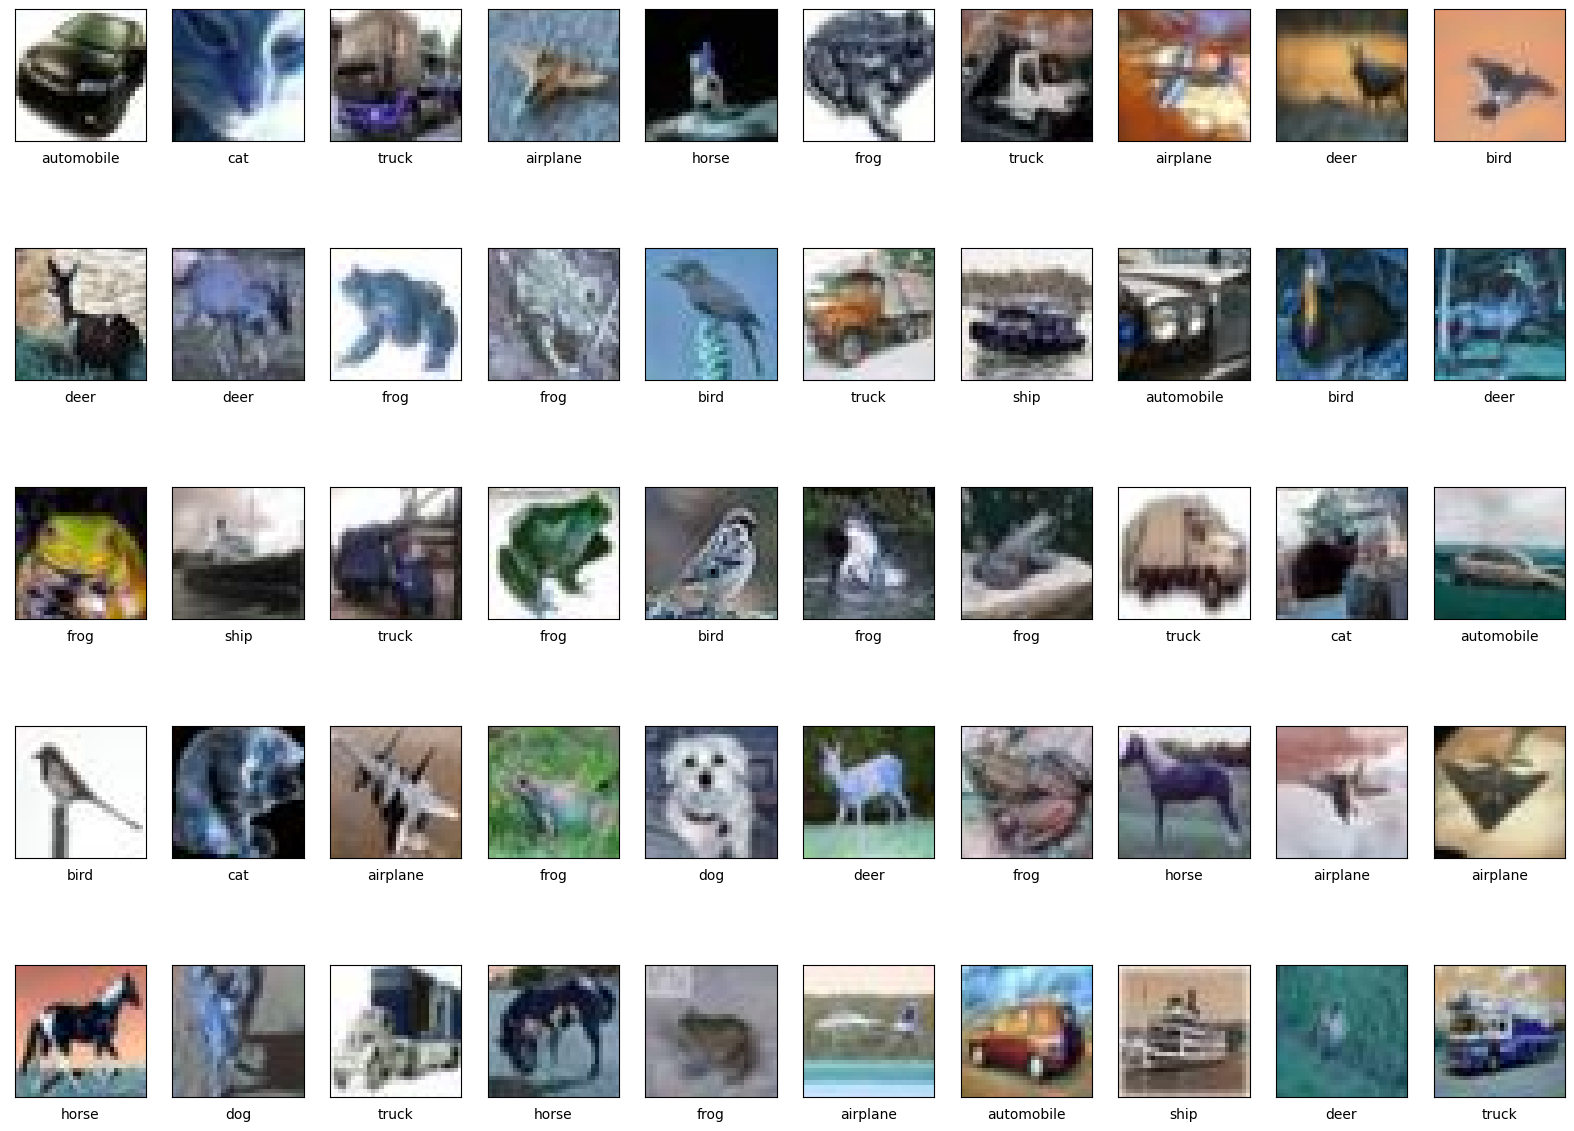

In [5]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,15))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [6]:
f0 = TRAIN_DATA[0:999]
f1 = TRAIN_DATA[1000:1999]
f2 = TRAIN_DATA[2000:2999]
f3 = TRAIN_DATA[3000:3999]
f4 = TRAIN_DATA[4000:5000]

In [34]:
class NearestNeighbour:
    
    def __init__(self, K, distancemetric="l2"):
        self.K = K
        self.trainSet = None
        self.distanceMetric = distancemetric.lower()
        
    def fit(self, train):
        self.trainSet = train
    
        
#Calculate l2 distance
    def L2_distance(self, train_img, test_img):
        temp = train_img - test_img
        dis = np.sqrt(np.sum (np.square (temp) ) )
        return dis


#distance calculator function
    def distanceCalculator(self,validate):
        accuracy = 0
        for vidx in range(len (validate) ):
            distnaceList = []
            counter = 0
            for tidx in range(len (self.trainSet) ):
                d = 0
                if self.distanceMetric == 'l2':
                    d = self.L2_distance(self.trainSet[tidx] [0], validate[vidx] [0])
                distnaceList.append((d, self.trainSet[tidx] [1] ) )
                    

#distance arrray sorting
        distnaceList.sort(key = (lambda a: a[0]) )
        labels = [v [1] for v in distnaceList [:self.K] ]
        label = max(set (labels), key = labels.count)
            
        if label == validate[vidx][1]:
            counter += 1
            
        accuracy += counter
            
        return accuracy, (accuracy / len(validate) )
    

#function prediction
    def predict(self, validate):
        return self.distanceCalculator(validate)


def plot_Accuracies(fold,K_choices,accuracies):
    best = [0,0]
    for K in K_choices:
        accu = accuracies [K]
        if best[1] < max(accu):
            best[0] = K
            best[1] = max(accu)
        plt.scatter([K] * len(accu), accu)




    # plot the trend line with error bars that correspond to standard deviation
    accuracies_mean = np.array([np.mean(v) for k, v in sorted(accuracies.items() ) ] )
    accuracies_std = np.array([np.std(v) for k, v in sorted(accuracies.items() ) ] )
    plt.errorbar(K_choices, accuracies_mean, yerr = accuracies_std)
    plt.title(f"Cross-validation   fold={fold}   K={best[0]}   Accuracy = {best[1]}")
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()

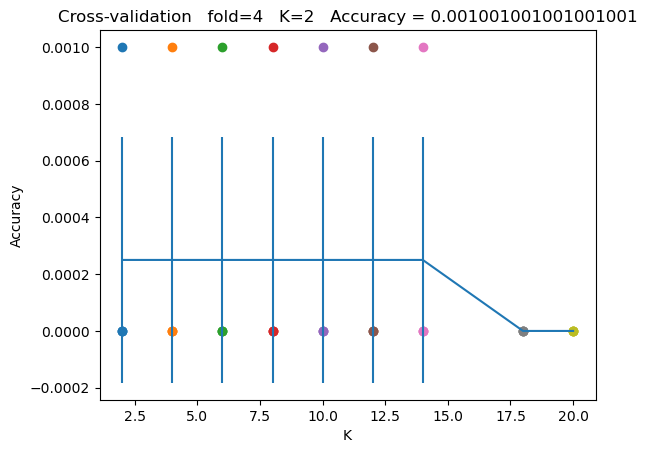

In [40]:
K_choices = [2,4,6,8,10,12,14,18,20]

accuracis = {}
nfolds = 4

# create dictonary for k using empty list
for K in K_choices:
    accuracis[K] = []
    
for i in range(nfolds):
    if i==0:
        trainSet = f1+f2+f3+f4
        validate = f0 
    elif i==1:
        trainSet = f0+f2+f3+f4
        validate = f1
    elif i==2:
        trainSet = f1+f0+f3+f4
        validate = f2
    elif i==3:
        trainSet = f1+f2+f0+f4
        validate = f3
    elif i==4:
        trainSet = f1+f2+f3+f0
        validate = f4

    for K in K_choices:

        classifier = NearestNeighbour(K,'l2')
        classifier.fit(trainSet)
        counter, accu = classifier.predict(validate)

        accuracis[K].append(accu)


plot_Accuracies(4, K_choices, accuracis)
    